<AxesSubplot:>

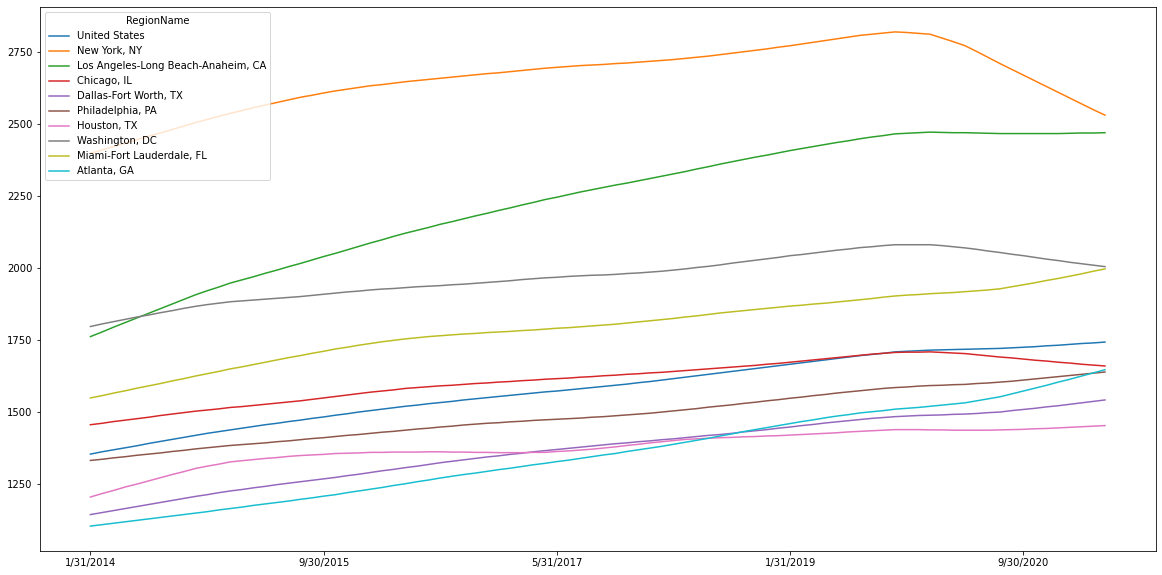

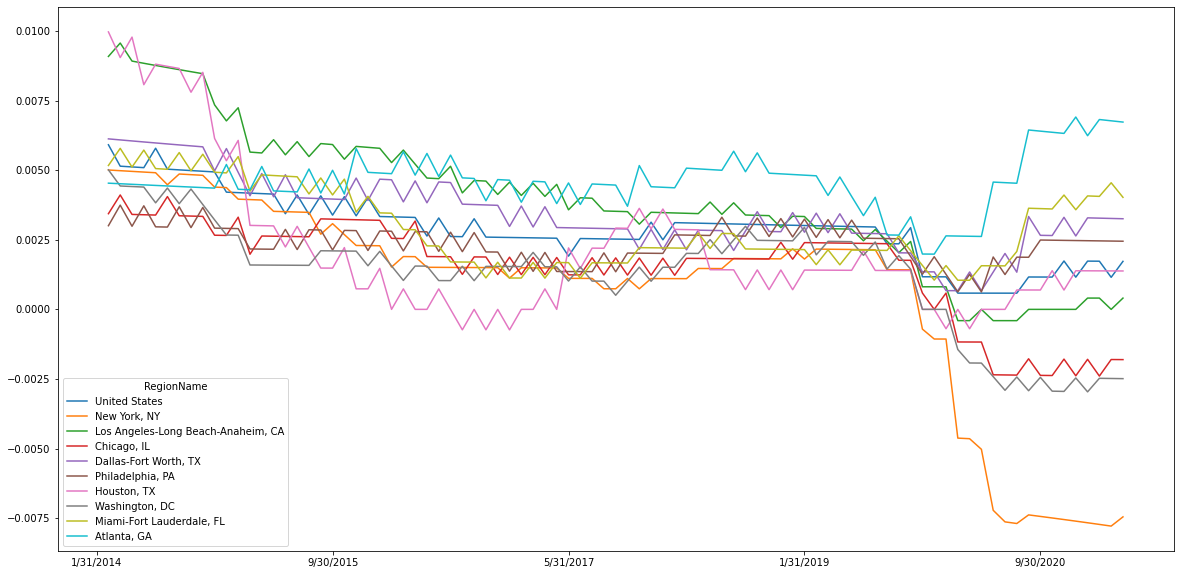

In [9]:
# Data Cleaning Rental File
import pandas as pd
import numpy as np
from datetime import datetime as dt
from pathlib import Path
import os
import sys
import csv
path=os.getcwd()

csv_path1=path+"/Files\Metro_ZORI_AllHomesPlusMultifamily_SSA.csv"
rental_file = pd.read_csv(csv_path1, index_col= "RegionName")

rental_file = rental_file.drop(columns=["SizeRank","RegionID"])

rent = rental_file.head(10)

rental = rent.transpose()

rental.plot.line(figsize=(20,10))

#pct_change_rent = rental.pct_change()

#pct_change_rent.plot.line(figsize=(20,10))